In [1]:
from google.colab import files
uploaded = files.upload()

Saving archive (10).zip to archive (10).zip


In [2]:
pip install numpy pandas scikit-learn nltk matplotlib seaborn tensorflow

In [3]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [4]:
import zipfile

zip_file_path = 'archive (10).zip'

with zipfile.ZipFile(zip_file_path, 'r') as z:
    print(z.namelist())

['archive (10)/', '__MACOSX/._archive (10)', 'archive (10)/Fake.csv', '__MACOSX/archive (10)/._Fake.csv', 'archive (10)/True.csv', '__MACOSX/archive (10)/._True.csv']


In [5]:
import pandas as pd
import zipfile

zip_file_path = 'archive (10).zip'

try:
    with zipfile.ZipFile(zip_file_path, 'r') as z:
        # Use the correct paths from namelist
        with z.open('archive (10)/True.csv') as true_file:
            df_true = pd.read_csv(true_file)

        with z.open('archive (10)/Fake.csv') as fake_file:
            df_fake = pd.read_csv(fake_file)


    df_true['label'] = 1
    df_fake['label'] = 0

    # Combine and shuffle
    df = pd.concat([df_true, df_fake], ignore_index=True)
    df = df.sample(frac=1, random_state=42).reset_index(drop=True)

    print("✅ Combined Dataset Head:")
    print(df.head())
    print("\nDataset Info:")
    df.info()

except FileNotFoundError:
    print(f"Error: The file '{zip_file_path}' was not found.")
except KeyError as e:
    print(f"Error: The file {e} was not found inside the zip archive.")

✅ Combined Dataset Head:
                                               title  \
0   BREAKING: GOP Chairman Grassley Has Had Enoug...   
1   Failed GOP Candidates Remembered In Hilarious...   
2   Mike Pence’s New DC Neighbors Are HILARIOUSLY...   
3  California AG pledges to defend birth control ...   
4  AZ RANCHERS Living On US-Mexico Border Destroy...   

                                                text       subject  \
0  Donald Trump s White House is in chaos, and th...          News   
1  Now that Donald Trump is the presumptive GOP n...          News   
2  Mike Pence is a huge homophobe. He supports ex...          News   
3  SAN FRANCISCO (Reuters) - California Attorney ...  politicsNews   
4  Twisted reasoning is all that comes from Pelos...      politics   

               date  label  
0     July 21, 2017      0  
1       May 7, 2016      0  
2  December 3, 2016      0  
3  October 6, 2017       1  
4      Apr 25, 2017      0  

Dataset Info:
<class 'pandas.core.frame.Da

In [6]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    """
    Cleans the input text by removing URLs, punctuation, numbers,
    and stopwords, and then applies lemmatization.
    """
    # Remove URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove punctuation and numbers
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    # Convert to lowercase and split into words
    words = text.lower().split()
    # Remove stopwords and apply lemmatization
    cleaned_words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return " ".join(cleaned_words)

# Combine title and text for a richer feature set, then clean it
df['combined_text'] = df['title'] + " " + df['text']
df['cleaned_text'] = df['combined_text'].apply(clean_text)

print("\nSample of cleaned text:")
print(df[['text', 'cleaned_text']].head())


Sample of cleaned text:
                                                text  \
0  Donald Trump s White House is in chaos, and th...   
1  Now that Donald Trump is the presumptive GOP n...   
2  Mike Pence is a huge homophobe. He supports ex...   
3  SAN FRANCISCO (Reuters) - California Attorney ...   
4  Twisted reasoning is all that comes from Pelos...   

                                        cleaned_text  
0  breaking gop chairman grassley enough demand t...  
1  failed gop candidate remembered hilarious mock...  
2  mike penny new dc neighbor hilariously trollin...  
3  california ag pledge defend birth control insu...  
4  az rancher living u mexico border destroy nanc...  


In [7]:
!pip install tensorflow keras --quiet


FAKE NEWS DETECTION - COMPARISON OF CLASSICAL & DEEP LEARNING MODELS

📊 Data Split:
Training set: 31446
Validation set: 6717
Test set: 6735

FEATURE EXTRACTION: TF-IDF
TF-IDF matrix shape: (31446, 5000)

TOKENIZATION FOR DEEP LEARNING MODELS

MODEL 4: CNN
Epoch 1/5
246/246 ━━━━━━━━━━━━━━━━━━━━ 63s 251ms/step - accuracy: 0.8410 - loss: 0.3434 - val_accuracy: 0.9870 - val_loss: 0.0376
Epoch 2/5
246/246 ━━━━━━━━━━━━━━━━━━━━ 82s 251ms/step - accuracy: 0.9937 - loss: 0.0227 - val_accuracy: 0.9903 - val_loss: 0.0302
Epoch 3/5
246/246 ━━━━━━━━━━━━━━━━━━━━ 80s 245ms/step - accuracy: 0.9989 - loss: 0.0050 - val_accuracy: 0.9914 - val_loss: 0.0252
Epoch 4/5
246/246 ━━━━━━━━━━━━━━━━━━━━ 81s 242ms/step - accuracy: 0.9999 - loss: 9.8185e-04 - val_accuracy: 0.9905 - val_loss: 0.0303
Epoch 5/5
246/246 ━━━━━━━━━━━━━━━━━━━━ 60s 244ms/step - accuracy: 1.0000 - loss: 3.6795e-04 - val_accuracy: 0.9911 - val_loss: 0.0287
211/211 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step

MODEL 5: LSTM
Epoch 1/5
246/246 ━━━━━━━━━━━

<Figure size 1000x600 with 0 Axes>

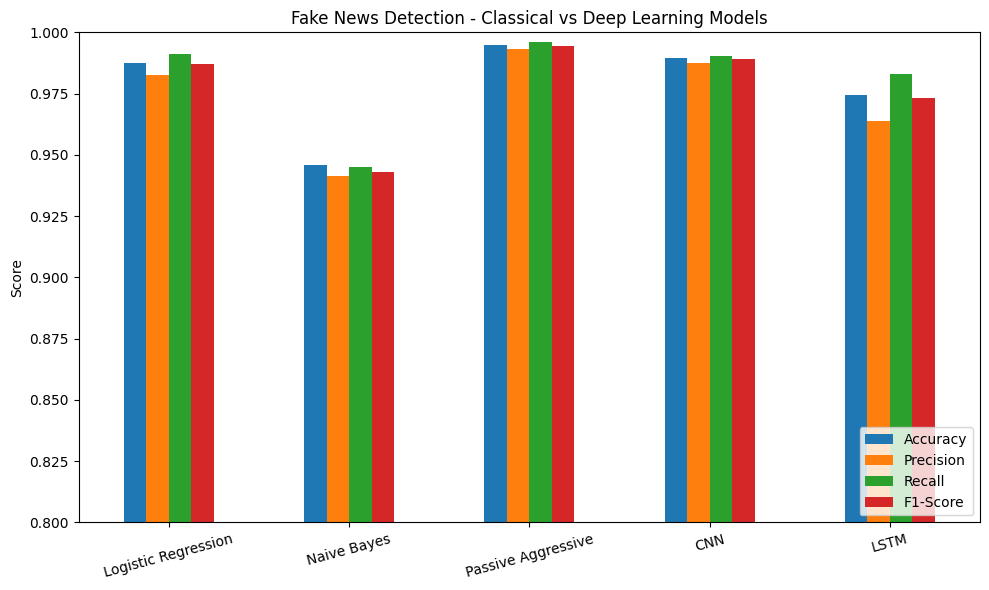


 All models evaluated successfully and visualization saved!


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, LSTM, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

print("="*70)
print("FAKE NEWS DETECTION - COMPARISON OF CLASSICAL & DEEP LEARNING MODELS")
print("="*70)


X = df['cleaned_text'].values
y = df['label'].values

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.15, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.176, random_state=42, stratify=y_temp)

print(f"\n📊 Data Split:")
print(f"Training set: {len(X_train)}")
print(f"Validation set: {len(X_val)}")
print(f"Test set: {len(X_test)}")


print("\n" + "="*70)
print("FEATURE EXTRACTION: TF-IDF")
print("="*70)

tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1, 2), min_df=2, max_df=0.8)
X_train_tfidf = tfidf.fit_transform(X_train)
X_val_tfidf = tfidf.transform(X_val)
X_test_tfidf = tfidf.transform(X_test)

print(f"TF-IDF matrix shape: {X_train_tfidf.shape}")


lr_model = LogisticRegression(max_iter=1000, random_state=42, n_jobs=-1)
lr_model.fit(X_train_tfidf, y_train)
lr_pred_test = lr_model.predict(X_test_tfidf)


nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
nb_pred_test = nb_model.predict(X_test_tfidf)


pa_model = PassiveAggressiveClassifier(max_iter=50, random_state=42, n_jobs=-1)
pa_model.fit(X_train_tfidf, y_train)
pa_pred_test = pa_model.predict(X_test_tfidf)


print("\n" + "="*70)
print("TOKENIZATION FOR DEEP LEARNING MODELS")
print("="*70)

max_words = 10000
max_len = 200
embedding_dim = 100

tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

X_train_seq = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=max_len, padding='post')
X_val_seq = pad_sequences(tokenizer.texts_to_sequences(X_val), maxlen=max_len, padding='post')
X_test_seq = pad_sequences(tokenizer.texts_to_sequences(X_test), maxlen=max_len, padding='post')


print("\n" + "="*70)
print("MODEL 4: CNN")
print("="*70)

cnn_model = Sequential([
    Embedding(max_words, embedding_dim, input_length=max_len),
    Conv1D(128, 5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

cnn_model.compile(optimizer=Adam(1e-3), loss='binary_crossentropy', metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

cnn_model.fit(X_train_seq, y_train, validation_data=(X_val_seq, y_val),
              epochs=5, batch_size=128, verbose=1, callbacks=[early_stop])

cnn_pred_test = (cnn_model.predict(X_test_seq) > 0.5).astype(int)


print("\n" + "="*70)
print("MODEL 5: LSTM")
print("="*70)

lstm_model = Sequential([
    Embedding(max_words, embedding_dim, input_length=max_len),
    LSTM(128, return_sequences=False),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

lstm_model.compile(optimizer=Adam(1e-3), loss='binary_crossentropy', metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

lstm_model.fit(X_train_seq, y_train, validation_data=(X_val_seq, y_val),
               epochs=5, batch_size=128, verbose=1, callbacks=[early_stop])

lstm_pred_test = (lstm_model.predict(X_test_seq) > 0.5).astype(int)


print("\n" + "="*70)
print("MODEL COMPARISON RESULTS")
print("="*70)

models_results = {
    'Logistic Regression': {
        'Accuracy': accuracy_score(y_test, lr_pred_test),
        'Precision': precision_score(y_test, lr_pred_test),
        'Recall': recall_score(y_test, lr_pred_test),
        'F1-Score': f1_score(y_test, lr_pred_test)
    },
    'Naive Bayes': {
        'Accuracy': accuracy_score(y_test, nb_pred_test),
        'Precision': precision_score(y_test, nb_pred_test),
        'Recall': recall_score(y_test, nb_pred_test),
        'F1-Score': f1_score(y_test, nb_pred_test)
    },
    'Passive Aggressive': {
        'Accuracy': accuracy_score(y_test, pa_pred_test),
        'Precision': precision_score(y_test, pa_pred_test),
        'Recall': recall_score(y_test, pa_pred_test),
        'F1-Score': f1_score(y_test, pa_pred_test)
    },
    'CNN': {
        'Accuracy': accuracy_score(y_test, cnn_pred_test),
        'Precision': precision_score(y_test, cnn_pred_test),
        'Recall': recall_score(y_test, cnn_pred_test),
        'F1-Score': f1_score(y_test, cnn_pred_test)
    },
    'LSTM': {
        'Accuracy': accuracy_score(y_test, lstm_pred_test),
        'Precision': precision_score(y_test, lstm_pred_test),
        'Recall': recall_score(y_test, lstm_pred_test),
        'F1-Score': f1_score(y_test, lstm_pred_test)
    }
}

comparison_df = pd.DataFrame(models_results).T
print("\n Model Performance Comparison:\n", comparison_df.round(4))


plt.figure(figsize=(10, 6))
comparison_df.plot(kind='bar', figsize=(10, 6))
plt.title("Fake News Detection - Classical vs Deep Learning Models")
plt.ylabel("Score")
plt.ylim(0.8, 1.0)
plt.xticks(rotation=15)
plt.legend(loc='lower right')
plt.tight_layout()

plt.show()

print("\n All models evaluated successfully and visualization saved!")
